# 00. PyTorch fundamentals

Resource notebook: https://www.learnpytorch.io/00_pytorch_fundamentals/

In [55]:
# Pytorch importation
#!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu128

In [109]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)

2.7.0+cpu


### Introduction to Tensors

Tensors are the fundamental building block of machine learning. 
Their job is to represent data in a numerical way.
#### Creating Tensors:
PyTorch tensors are created using torch.Tensor() = https://docs.pytorch.org/docs/stable/tensors.html

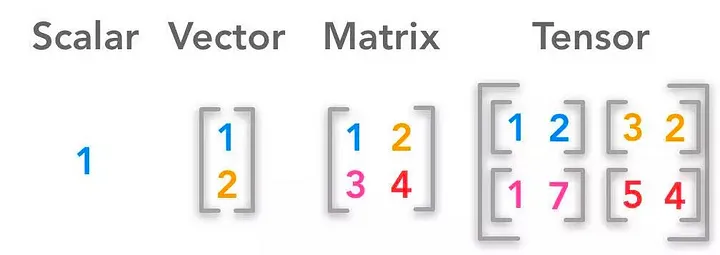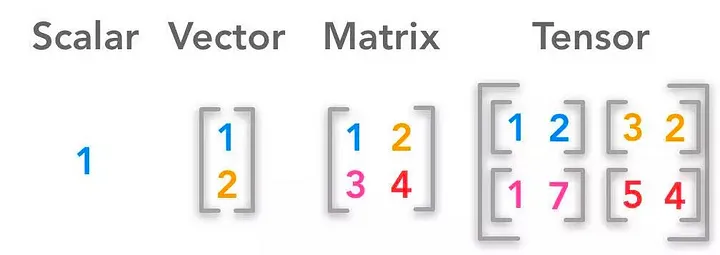



In [110]:
# Scalar (no dimensions, is a single number)
scalar = torch.tensor(7)
scalar

tensor(7)

In [111]:
scalar.ndim

0

In [112]:
# Get tensor back as Python int
scalar.item()

7

In [113]:
# Vector 
vector = torch.tensor([7,7])
vector

tensor([7, 7])

In [114]:
vector.ndim

1

In [115]:
vector.shape

torch.Size([2])

In [116]:
# MATRIX
MATRIX = torch.tensor([[7,8],
                       [9,10]])
MATRIX

tensor([[ 7,  8],
        [ 9, 10]])

In [117]:
MATRIX.ndim

2

In [118]:
MATRIX[0]

tensor([7, 8])

In [119]:
MATRIX.shape

torch.Size([2, 2])

In [120]:
# TENSOR
TENSOR = torch.tensor([[[1,2,3],
                        [3,6,9],
                        [2,4,5]]])
TENSOR

tensor([[[1, 2, 3],
         [3, 6, 9],
         [2, 4, 5]]])

In [121]:
TENSOR.ndim

3

In [122]:
# The '1' means we got ONE 3 x 3 shaped tensor
TENSOR.shape

torch.Size([1, 3, 3])

In [123]:
TENSOR[0]

tensor([[1, 2, 3],
        [3, 6, 9],
        [2, 4, 5]])

In [124]:
TENSOR[0,0]

tensor([1, 2, 3])

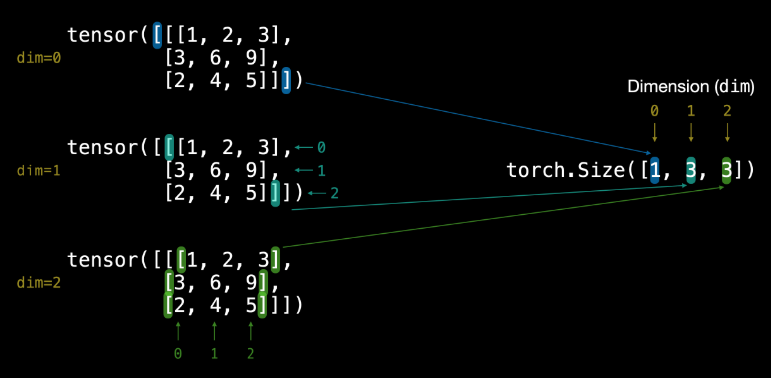

### Let's practice with tensors to get used to dimensions : 

In [125]:
# Creating a 1,2,4 shape tensor
X1 = torch.tensor([[[2,4,9,1],
                    [1,5,8,2]]])
X1

tensor([[[2, 4, 9, 1],
         [1, 5, 8, 2]]])

In [126]:
# Creating a 2,2,3 shape tensor
X2 = torch.tensor ([
    [[1,7,2],
     [5,6,1]],
    [[2,6,8],
     [1,1,4]]
])
X2

tensor([[[1, 7, 2],
         [5, 6, 1]],

        [[2, 6, 8],
         [1, 1, 4]]])

In [127]:
X2.shape

torch.Size([2, 2, 3])

In [128]:
# Creating a 3,3,4 tensor
X3 = torch.tensor([
    [[1,1,1,4],
     [3,8,9,1],  # 1st block
     [6,2,9,0]],
    [[1,5,2,0],
     [2,8,1,0],  # 2nd block
     [1,1,1,1]],
    [[0,0,2,3],
     [1,4,2,8], # 3rd block
     [1,1,6,1]]
])
X3

tensor([[[1, 1, 1, 4],
         [3, 8, 9, 1],
         [6, 2, 9, 0]],

        [[1, 5, 2, 0],
         [2, 8, 1, 0],
         [1, 1, 1, 1]],

        [[0, 0, 2, 3],
         [1, 4, 2, 8],
         [1, 1, 6, 1]]])

### Random tensors
Why random tensors? 

Random tensors are important because the way many neural networks learn is that they start with tensors full of random numbers and then adjust those random numbers to better represent the data. 

```Start with random numbers -> look at data -> update random numbers -> look at data -> update random numbers```

Torch random tensors: https://docs.pytorch.org/docs/stable/generated/torch.rand.html

In [129]:
# Create a random tensor of size (3,4)
random_tensor = torch.rand(3,4)
random_tensor

tensor([[0.1251, 0.3146, 0.6639, 0.0259],
        [0.2529, 0.6693, 0.8982, 0.5031],
        [0.3037, 0.1545, 0.6557, 0.0548]])

In [130]:
random_tensor.ndim

2

In [131]:
# Create a random tensor with similar shape to an image tensor
random_image_size_tensor = torch.rand(size=(224,224,3)) # Height, Width, Colors channels (R,G,B)
random_image_size_tensor.shape, random_image_size_tensor.ndim

(torch.Size([224, 224, 3]), 3)

random_image_size_tensor

### Zeros and ones

Helpful when you are creating some form of mask. 

In [132]:
# Create a tensor of all zeros 
zeros = torch.zeros(size=(3,4))
zeros

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [133]:
zeros*random_tensor

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [134]:
# Create a tensor of all ones
ones = torch.ones(size=(3,4))
ones

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [135]:
# Default datatype of pytorch
ones.dtype

torch.float32

### Creating a range of tensors and tensors-like

In [136]:
# Use torch.arange()
one_to_ten = torch.arange(start=0, end=1000, step=77) # 77 + 77 + 77 ...
one_to_ten

tensor([  0,  77, 154, 231, 308, 385, 462, 539, 616, 693, 770, 847, 924])

Sometimes you might want one tensor of a certain type with the same shape as another tensor. 
For example, a tensor of all zeros with the same shape as a previous tensor.

In [137]:
# Creating tensors-like
ten_zeros = torch.zeros_like(input=one_to_ten)
ten_zeros

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [138]:
ten_ones = torch.ones_like(input=one_to_ten)
ten_ones

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### Tensor datatypes

**Note:**
Tensor datatypes is one of the 3 big issues with PyTorch & deep learning:
1. Tensors not right datatype
2. Tensors not right shape
3. Tensors not on the right device

In [139]:
 float_32_tensor = torch.tensor([3.0, 6.0, 9.0],
                              dtype=None, # what datatype is the tensor (e.g., float32, float16, etc)
                              device=None, #What device is your tensor on. cpu' by default. Operations on tensors on different devices should raised errors. 
                              requires_grad=False) # wheter or not to track gradients with this tensors operations
float_32_tensor, float_32_tensor.dtype

(tensor([3., 6., 9.]), torch.float32)

In [140]:
float_16_tensor = float_32_tensor.type(torch.float16) # conversion of the last tensor
float_16_tensor

tensor([3., 6., 9.], dtype=torch.float16)

In [141]:
# Multiplying different datatype tensors
float_16_tensor * float_32_tensor # Sometimes (like this one) its not raising error for datatype issues. 

tensor([ 9., 36., 81.])

### Change datatype
use method .type

In [142]:
int_64_tensor = torch.tensor([1,2,3,1,4], dtype=torch.int64)
int_64_tensor,int_64_tensor.dtype

(tensor([1, 2, 3, 1, 4]), torch.int64)

In [143]:
int_32_tensor = int_64_tensor.type(torch.int32)
int_32_tensor, int_32_tensor.dtype

(tensor([1, 2, 3, 1, 4], dtype=torch.int32), torch.int32)

### Getting information from tensors

1. Tensors not right datatype -to get datatype from a tensor, can use ```tensor.dtype```
2. Tensors not right shape - to get shape from a tensor, can use ```tensor.shape```
3. Tensors not on the right device - to get device from a tensor, can use ```tensor.device```

In [144]:
# Create a tensor
some_tensor = torch.rand(3,4)
some_tensor

tensor([[0.2070, 0.1989, 0.5596, 0.3108],
        [0.6940, 0.8544, 0.9462, 0.8277],
        [0.1957, 0.4550, 0.2440, 0.9739]])

In [145]:
# Find out details about some tensor
print(some_tensor,'\n')
print(f'Datatype of tensor:{some_tensor.dtype}\n')
print(f'Shape of tensor:{some_tensor.shape}\n')
print(f'Device of tensor:{some_tensor.device}')

tensor([[0.2070, 0.1989, 0.5596, 0.3108],
        [0.6940, 0.8544, 0.9462, 0.8277],
        [0.1957, 0.4550, 0.2440, 0.9739]]) 

Datatype of tensor:torch.float32

Shape of tensor:torch.Size([3, 4])

Device of tensor:cpu


In [146]:
# Excercise 2
tensor_ex = torch.rand(3,2,5, dtype=torch.float64)
print(f'Datatype of tensor:{tensor_ex.dtype}\n')
print(f'Shape of tensor:{tensor_ex.shape}\n')
print(f'Device of tensor:{tensor_ex.device}')


Datatype of tensor:torch.float64

Shape of tensor:torch.Size([3, 2, 5])

Device of tensor:cpu


### Manipulating Tensors (tensor operations)

Tensor operations include: 
* Addition
* Substraction
* Multiplication (element-wise)
* Division
* Matrix multiplication

In [147]:
# Create a tensor
tensor = torch.tensor([1,2,3])
tensor + 10

tensor([11, 12, 13])

In [148]:
# Multiply tensor by 10 
tensor * 10 

tensor([10, 20, 30])

In [149]:
# Substract 10 
tensor - 10

tensor([-9, -8, -7])

In [150]:
# Try out PyTorch in-built functions : torch.mul
torch.mul(tensor, 10) # It will raise the same result as tensor * 10

tensor([10, 20, 30])

In [151]:
# Try out PyTorch in-built functions : torch.add
torch.add(tensor, 10)

tensor([11, 12, 13])

In [152]:
# Try out PyTorch in-built functions : torch.sub
torch.sub(tensor, 10)

tensor([-9, -8, -7])

In [153]:
# Try out PyTorch in-built functions : torch.div
torch.div(tensor, 10)

tensor([0.1000, 0.2000, 0.3000])

### Matrix multiplication

Two main ways of performing multiplication in neural networks and deep learning:

1. Element-wise multiplication
2. Matrix multiplication (dot product)

More information on multiplying matirces: https://www.mathsisfun.com/algebra/matrix-multiplying.html 


There are two main rules that performing matrix multiplication needs to satisfy:
1. The __inner dimensions__ must match (columns of the 1st matrix must match with rows of the 2nd matrix):
   * `(3,2) @ (3,2)` won't work
   * `(2,3) @ (3,2)` will work
   * `(3,2) @ (2,3)` will work
2. The resulting matrix has the shape of the __outer dimensions__ (rows of the 1st matrix and columns of the 2nd matrix):
   * `(2,3) @ (3,2)` -> `(2,2)`
   * `(3,2) @ (2,3)` -> `(3,3)` 

In [154]:
torch.matmul(torch.rand(10,10), torch.rand(10,10))

tensor([[2.2749, 2.4452, 2.1803, 2.6885, 2.1398, 2.3605, 2.7857, 1.6250, 1.8613,
         1.9629],
        [2.9096, 2.8939, 2.2179, 3.9727, 2.9740, 3.0486, 3.8642, 2.1625, 2.4819,
         3.4673],
        [3.5097, 4.1678, 2.8732, 4.2489, 2.7910, 3.8621, 4.0528, 2.7695, 3.1181,
         3.9919],
        [3.2174, 2.7450, 2.8665, 3.2577, 3.4940, 2.4645, 3.6781, 1.7167, 2.5290,
         3.3505],
        [1.8566, 2.1077, 1.3394, 2.5014, 2.1417, 2.1204, 2.6695, 1.4527, 1.5404,
         1.7780],
        [2.0571, 2.3369, 1.9393, 3.4314, 2.2829, 2.5469, 3.2259, 2.0863, 2.4266,
         2.8888],
        [2.9079, 3.2442, 2.5333, 3.8593, 2.8189, 3.3335, 3.4207, 2.3825, 2.5822,
         3.9552],
        [2.9594, 3.0387, 2.1529, 3.7190, 2.5087, 3.0593, 3.5317, 1.9525, 2.7814,
         3.0118],
        [2.3951, 2.8695, 1.8558, 3.3919, 2.6624, 2.8664, 3.3237, 2.4247, 1.8775,
         3.1318],
        [3.1104, 2.7463, 2.6290, 3.5478, 2.7172, 2.4011, 3.7307, 2.0673, 2.6634,
         3.5781]])

In [155]:
# Element wise multiplication
tensor = torch.tensor([1,2,3])
print(tensor, '*', tensor)
print(f'Equals:{tensor*tensor}')

tensor([1, 2, 3]) * tensor([1, 2, 3])
Equals:tensor([1, 4, 9])


In [156]:
# Matrix multiplication
torch.matmul(tensor,tensor) #dot product

tensor(14)

In [157]:
# Matrix multiplication by hand
1*1 + 2*2 + 3*3


14

In [158]:
# Matrix multiplication by loop
%time
value=0
for i in range(len(tensor)):
    value+= tensor[i] * tensor [i]
print(value)

CPU times: total: 0 ns
Wall time: 0 ns
tensor(14)


In [167]:
%time
torch.matmul(tensor,tensor)

CPU times: total: 0 ns
Wall time: 0 ns


tensor(14)

### One of the most common errors in deep learning: shape errors

http://matrixmultiplication.xyz/

In [168]:
# Shapes for matrix multiplication
tensor_A = torch.tensor([[1,2],
                         [3,4],
                         [5,6]])

tensor_B = torch.tensor([[7,10],
                         [8,11],
                         [9,12]])
torch.matmul(tensor_A, tensor_B) 

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x2 and 3x2)

In [169]:
tensor_A.shape, tensor_B.shape # That's why its raising error: columns of first matrix must match rows of 2nd matrix

(torch.Size([3, 2]), torch.Size([3, 2]))

To fix our tensor shape issues, we can manipulate the shape of one of our tensors using a **transpose**.

A **transpose** switches the axes or dimensions of a given tensor

In [170]:
tensor_B, tensor_B.shape

(tensor([[ 7, 10],
         [ 8, 11],
         [ 9, 12]]),
 torch.Size([3, 2]))

In [171]:
tensor_B.T, tensor_B.T.shape

(tensor([[ 7,  8,  9],
         [10, 11, 12]]),
 torch.Size([2, 3]))

In [172]:
# The matrix multiplication operation works when tensor_B is transposed
print(f'Original shapes: tensor_A = {tensor_A.shape}, tensor_B = {tensor_B.shape}\n')
print(f'New shapes: tensor_A = {tensor_A.shape} (same as above), tensor_B.T = {tensor_B.T.shape}\n')
print(f'Multiplying: {tensor_A.shape} @ {tensor_B.T.shape} <- inner dimensiones must match\n')
output =  torch.matmul(tensor_A, tensor_B.T)
print(output)
print(f'\nOutput shape: {output.shape}')


Original shapes: tensor_A = torch.Size([3, 2]), tensor_B = torch.Size([3, 2])

New shapes: tensor_A = torch.Size([3, 2]) (same as above), tensor_B.T = torch.Size([2, 3])

Multiplying: torch.Size([3, 2]) @ torch.Size([2, 3]) <- inner dimensiones must match

tensor([[ 27,  30,  33],
        [ 61,  68,  75],
        [ 95, 106, 117]])

Output shape: torch.Size([3, 3])


In [173]:
output =  torch.matmul(tensor_A.T, tensor_B)
output

tensor([[ 76, 103],
        [100, 136]])

## Finding the min, max, mean, sum, etc (tensor aggregation)

In [174]:
# Create a tensor
x = torch.arange(0,100,10)
x

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [175]:
# Find the min
torch.min(x), x.min

(tensor(0), <function Tensor.min>)

In [176]:
# Find the max
torch.max(x), x.max()

(tensor(90), tensor(90))

In [177]:
# Find the mean
#torch.mean(x)

In [178]:
# Let-s fix it! - note : the torch.mean() function requires a tensor of float32 datatype to work
torch.mean(x.type(torch.float32)), x.type(torch.float32).mean()

(tensor(45.), tensor(45.))

In [179]:
# Find the sum 
torch.sum(x), x.sum()

(tensor(450), tensor(450))

In [180]:
x[9]

tensor(90)

## Finding the positional min and max

In [181]:
x

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [182]:
# Find the position (index) in tensor that has the minimum value with argmin() -> returns index position of target tensor where the minimum value occurs
x.argmin()

tensor(0)

In [183]:
# Find the position in tensor that has the maximum v.ralue with argmax()
x.argmax()

tensor(9)

## Reshaping, stacking, squeezing, and unsqueezing tensor


* Reshaping - reshapes an input tensor to a defined shape. Reshape has to be compatible with the original size. 


* View - return a view of an input tensor of a certain shape but keep the same memory as the original tensor
* Stacking - combine multiple tensors on top of each other (vstack) or side by side (hstack)
* Squeeze - removes all `1` dimensions from a tensor
* Unsqueeze - add a `1` dimension to a target tensor
* Permute - Return a view of the input with dimensiones permuted (swapped) in a certain way

In [184]:
# Let's create a tensor
x = torch.arange(1., 10)
x, x.shape

(tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.]), torch.Size([9]))

In [185]:
# Add an extra dimension with reshape
x_reshaped = x.reshape(1, 9)
x_reshaped, x_reshaped.shape # It added a new dimension

(tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

In [186]:
# Reshaped has to be compatible with the original size
x_reshaped = x.reshape(1, 9)
x_reshaped

tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]])

In [187]:
x = torch.arange(1., 13)# We will have 12 elements fronm 0 to 12
x, x.shape

(tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.]),
 torch.Size([12]))

In [188]:
# Reshaped has to be compatible with the original size
x_reshaped = x.reshape(3, 4)
x_reshaped

tensor([[ 1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.]])

In [189]:
# Change the view
x = torch.arange(1., 10)
z = x.view(1,9) # z is a different view of x
z, z.shape

(tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

In [190]:
# Changing z changes x (because a view of a tensor shares the same memory as the original input)
z[:,0] = 5
z,x

(tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]]),
 tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.]))

In [191]:
# Stack tensors on top of each other
x_stacked = torch.stack([x,x,x,x], dim=0) # we can use dim=1 too to stack
x_stacked

tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.]])

In [192]:
x_reshaped = x.reshape(1,9)
x_reshaped

tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]])

In [193]:
# torch.squeeze() - removes all single dimnesions from a target tensor
print(f'Previous tensor: {x_reshaped}')
print(f'Previous shape: {x_reshaped.shape}')


# Remove extra dimensions from x_reshaped
x_squeezed = x_reshaped.squeeze()
print(f'\nNew tensor: {x_squeezed}')
print(f'New shape:{x_squeezed.shape}')

Previous tensor: tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]])
Previous shape: torch.Size([1, 9])

New tensor: tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.])
New shape:torch.Size([9])


In [194]:
x_reshaped.squeeze() # it will remove the '1' dimension (remember that x_reshaped had two dimensions)

tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.])

In [195]:
x_reshaped.squeeze().shape

torch.Size([9])

In [196]:
# torch.unsqueeze() - adds a single dimension to a target tensor at a specific dim (dimension)
print(f'Previous target: {x_squeezed}')
print(f'Previous shape: {x_squeezed.shape}')

# Add an extra dimension with unsqueeze
x_unsqueezed = x_squeezed.unsqueeze(dim=0)
print(f'\nNew tensor: {x_unsqueezed}')
print(f'New shape: {x_unsqueezed.shape}')

# If I use  dim=0, it will add a new dimension like [new dimension, 9].
# If I use dim=1, it will add a new dimension like [9, new dimension]

Previous target: tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.])
Previous shape: torch.Size([9])

New tensor: tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]])
New shape: torch.Size([1, 9])


In [197]:
# torch.permute - rearranges the dimensions of a target tensor in a specified order
x_original = torch.rand(size=(224,224,3)) # [height, width, colour_channels]

# Permute the original tensor to rearrange the axis (or dim) order
x_permuted = x_original.permute(2,0,1) #shift axis 0->1, 1->2, 2->0 (indexes)
print(f'Previous shape: {x_original.shape}')
print(f'New shape:{x_permuted.shape}') # [colour_channels, height, width]

Previous shape: torch.Size([224, 224, 3])
New shape:torch.Size([3, 224, 224])


In [198]:
# Since x_permuted shares the same space in memory of x_original, chaning x_original will change x_permuted
x_original[0,0,0] = 123456789
x_original[0,0,0],x_permuted[0,0,0]

(tensor(1.2346e+08), tensor(1.2346e+08))

## Indexing (selecting data from tensors)

Indexing with PyTorch is similar to indexing with NumPy

In [199]:
# Create a tensor
import torch
x = torch.arange(1,10).reshape(1,3,3)
x,x.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([1, 3, 3]))

In [200]:
# Let's index on our new tensor
x[0]

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [201]:
# Let's index on the middle bracket (dim=1)
x[0][0], x[0,0] #the same

(tensor([1, 2, 3]), tensor([1, 2, 3]))

In [202]:
# Let's index on the most inner (last dimension)
x[0][0][0]

tensor(1)

In [203]:
# You can also use ':' to select 'all' of a target dimension
x[:,0]

tensor([[1, 2, 3]])

In [204]:
# Get all values of 0th and 1st dimensions but only index 1 of 2nd dimension
x[:,:,1]

tensor([[2, 5, 8]])

In [205]:
x[:,:,2]

tensor([[3, 6, 9]])

In [206]:
# Get all values of the 0 dimension but only the 1 index value of the 1st and 2nd dimension
x[:, 1, 1]

tensor([5])

In [207]:
# Get index 0 of 0th and 2st dimension and all values of 2nd dimension
x[0, 0, :]

tensor([1, 2, 3])

In [208]:
# Index on x to return 9
x[0,2,2]

tensor(9)

In [209]:
# Index on x to return 3,6,9
x[:,:,2]

tensor([[3, 6, 9]])

## PyTorch tensors & NumPy

NumPy is a popular scientific Python numerical computing library. 

And because of this, PyTorch has a functionality to interact with it.

* Data in NumPy, want it PyTorch tensor -> `torch.from_numpy(ndarray)`
* PyTorch tensor -> NumPy -> `torch.Tensor.numpy()`

In [210]:
# Numpy array to tensor
import torch
import numpy as np

array = np.arange(1.0, 8.0)
tensor = torch.from_numpy(array) #warning : when converting from numpy -> pytorhc reflects numpy's default datatype of float64 unless specified otherwise

array, tensor

(array([1., 2., 3., 4., 5., 6., 7.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

In [211]:
array.dtype

dtype('float64')

In [212]:
tensor.dtype

torch.float64

In [213]:
# Change the value of array, what will this do to 'tensor'?
array = array + 1
array,tensor

(array([2., 3., 4., 5., 6., 7., 8.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

In [214]:
# Tensor to NumPy array
tensor = torch.ones(7)
numpy_tensor = tensor.numpy()
tensor, numpy_tensor

(tensor([1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

In [215]:
tensor.dtype

torch.float32

In [216]:
numpy_tensor.dtype

dtype('float32')

In [217]:
# Change the tensor, what happens to 'numpy_tensor'?
tensor = tensor + 1
tensor, numpy_tensor

(tensor([2., 2., 2., 2., 2., 2., 2.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

## Reproducbility (trying to take random out of random)

In short, how a neural network learns:
`start with random numbers -> tensor operations -> update random numbers to try and make them better representations of the data -> again -> again -> again...`

To reduce the randomness in neural networks and PyTorch comes the concept of a **random seed**. 

Essentially what the random seed does is 'flavour' the randomness. 

In [218]:
import torch

# Create two random tensors
random_tensor_A = torch.rand(3,4)
random_tensor_B = torch.rand(3,4)

print (random_tensor_A)
print (random_tensor_B)
print (random_tensor_A == random_tensor_B)

tensor([[0.1200, 0.7868, 0.7946, 0.1060],
        [0.8158, 0.1393, 0.1831, 0.1758],
        [0.5661, 0.0832, 0.7614, 0.4018]])
tensor([[0.6371, 0.5771, 0.0832, 0.9962],
        [0.8063, 0.6747, 0.4212, 0.7053],
        [0.4877, 0.1082, 0.1501, 0.0723]])
tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])


In [219]:
# Let's make some random but reproducible tensors
import torch

# Set the random seed
RANDOM_SEED = 42

# Apply random seed
torch.manual_seed(RANDOM_SEED)
random_tensor_C = torch.rand(3,4)

torch.manual_seed(RANDOM_SEED)
random_tensor_D = torch.rand(3,4) # since we're calling subsequent random methods, we have toc all twice the rand seed

print (random_tensor_C)
print (random_tensor_D)
print (random_tensor_C == random_tensor_D)

tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])


Extra resources for reproducibility:
* https://docs.pytorch.org/docs/stable/notes/randomness.html

* https://en.wikipedia.org/wiki/Random_seed

# Running tensors and PyTorch objects on the GPUs (and making faster computations)

GPUs = faster computation on numbers, thanks to CUDA + NVIDIA hardware + PyTorch working behing the scenes to make everything good.  

### Getting a GPU

1. Easiest - Use Google Colab for a free GPU (options to upgrade as well)
2. Use your own GPU - takes a little bit of setup and requires the investment of purchasing a GPU, there's lots of options. 
3. Use cloud computing - GCP, AWS, Azure, these services allow you to rent computers on the cloud and access them. 

For 2, 3 PyTorch + GPU drivers (CUDA) takes a little bit of setting up, to do this, refer to PyTorch setup documents. 

In [220]:
# Check for GPU access with PyTorch
import torch
torch.cuda.is_available()

False

In [221]:
# Setup device agnostic code
device = 'cuda' if torch.cuda.is_available()else 'cpu'
device

'cpu'

For PyTorch since it's capable of running compute on the GPU or CPU, it's best practice to setup device agnostic code: https://pytorch.org/docs/stable/notes/cuda.html#best-practices

E.g. run on GPU if available, else default to CPU

In [222]:
# Create a tensor (default on the cpu)
tensor = torch.tensor([1,2,3])

# Tensor not on GPU
print(tensor, tensor.device)

tensor([1, 2, 3]) cpu


In [223]:
# Move tensor to GPU (if available)
tensor_on_gpu = tensor.to(device)
tensor_on_gpu

# For now, we have no available a GPU

tensor([1, 2, 3])

In [225]:
# Moving tensors back to the CPU

# If tensor is on GPU, can't transform it to NumPy
tensor_back_on_cpu = tensor_on_gpu.cpu().numpy()
tensor_back_on_cpu

array([1, 2, 3], dtype=int64)

In [226]:
tensor_on_gpu

tensor([1, 2, 3])

## Exercises & Extra-curriculum

See exercises for this notebook here: https://www.learnpytorch.io/00_pytorch_fundamentals/#exercises